<a href="https://colab.research.google.com/github/gabrielealberto/Air-Liquide-Quant-Analysis-GEM-finance-club/blob/main/Air_Liquide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air Liquide Quantitative evaluation**

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

[*********************100%***********************]  2 of 2 completed


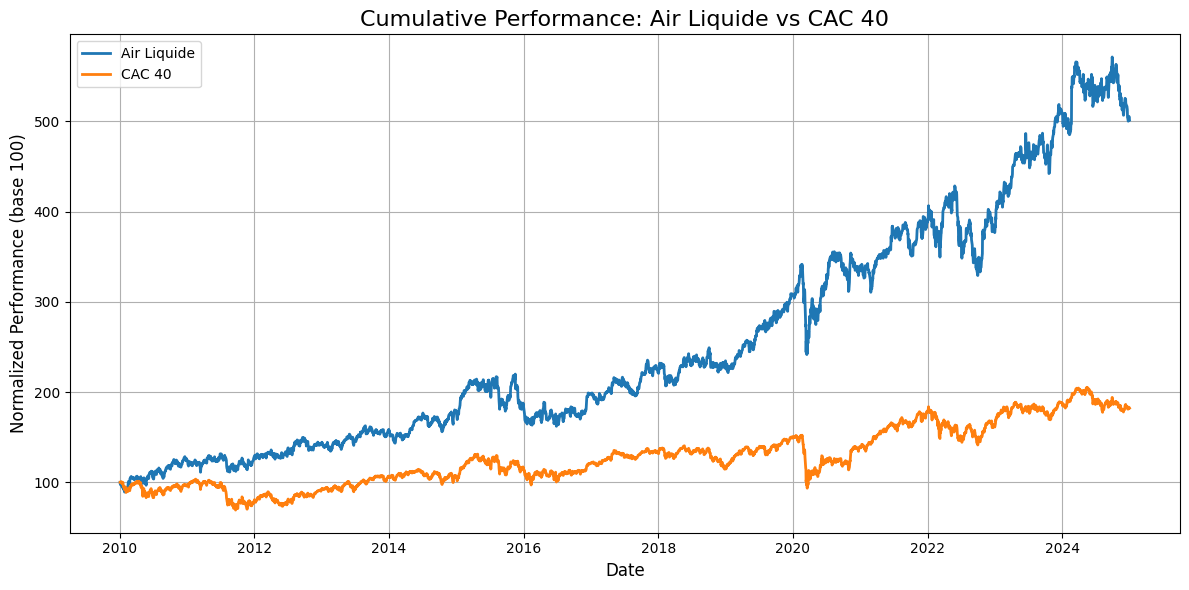

In [68]:
# Define tickers
tickers = {
    'Air Liquide': 'AI.PA',  # Paris Stock Exchange
    'CAC 40': '^FCHI'
}

# Download historical data
start_date = '2010-01-01'
end_date = '2024-12-31'

data = yf.download(list(tickers.values()), start=start_date, end=end_date, auto_adjust=True)['Close']

# Rename columns with readable names
data.columns = list(tickers.keys())

# Align data
data.dropna(inplace=True)
returns=data.pct_change().dropna()

# Calculate cumulative performance
cumulative_returns = (data / data.iloc[0]) * 100

# Plot
plt.figure(figsize=(12,6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col, linewidth=2)

plt.title('Cumulative Performance: Air Liquide vs CAC 40', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Performance (base 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
data

,Air Liquide,CAC 40
Date,,
2010-01-04,30.294769,4013.969971
2010-01-05,29.688868,4012.909912
2010-01-06,29.506029,4017.669922
2010-01-07,29.470173,4024.800049
2010-01-08,29.563393,4045.139893
...,...,...
2024-12-20,152.632706,7274.479980
2024-12-23,151.512863,7272.319824
2024-12-24,151.611099,7282.689941


In [70]:
 #-----------------------------
# 3. Align data and calculate returns
# -----------------------------
data.dropna(inplace=True)
returns = data.pct_change().dropna()

# -----------------------------
# 4. CORRECTED: Proper geometric mean calculation
# -----------------------------
# Media aritmetica giornaliera
arithmetic_mean_daily = returns.mean()

# CORRECTED: Media geometrica giornaliera (formula corretta)
geometric_mean_daily = ((1 + returns).prod() ** (1 / len(returns))) - 1

# CORRECTED: Annualizzazione corretta
arithmetic_mean_annual = arithmetic_mean_daily * 252
geometric_mean_annual = (1 + geometric_mean_daily) ** 252 - 1

# Volatilità
std_daily = returns.std()
std_annual = std_daily * np.sqrt(252)

# CORRECTED: Sharpe Ratio (assumendo risk-free rate = 0)
sharpe_ratio = geometric_mean_annual / std_annual

# Correlazione
correlation_matrix = returns.corr()


In [71]:
geometric_mean_annual

,0
Air Liquide,0.111781
CAC 40,0.040221


STATISTICAL ANALYSIS OF RETURNS

📊 ANNUALIZED GEOMETRIC MEAN:
Air Liquide    0.1118
CAC 40         0.0402
dtype: float64

📈 ANNUALIZED VOLATILITY:
Air Liquide    0.2036
CAC 40         0.1970
dtype: float64

🎯 SHARPE RATIO:
Air Liquide    0.549
CAC 40         0.204
dtype: float64

📉 DAILY VARIANCE:
Air Liquide    0.000165
CAC 40         0.000154
dtype: float64


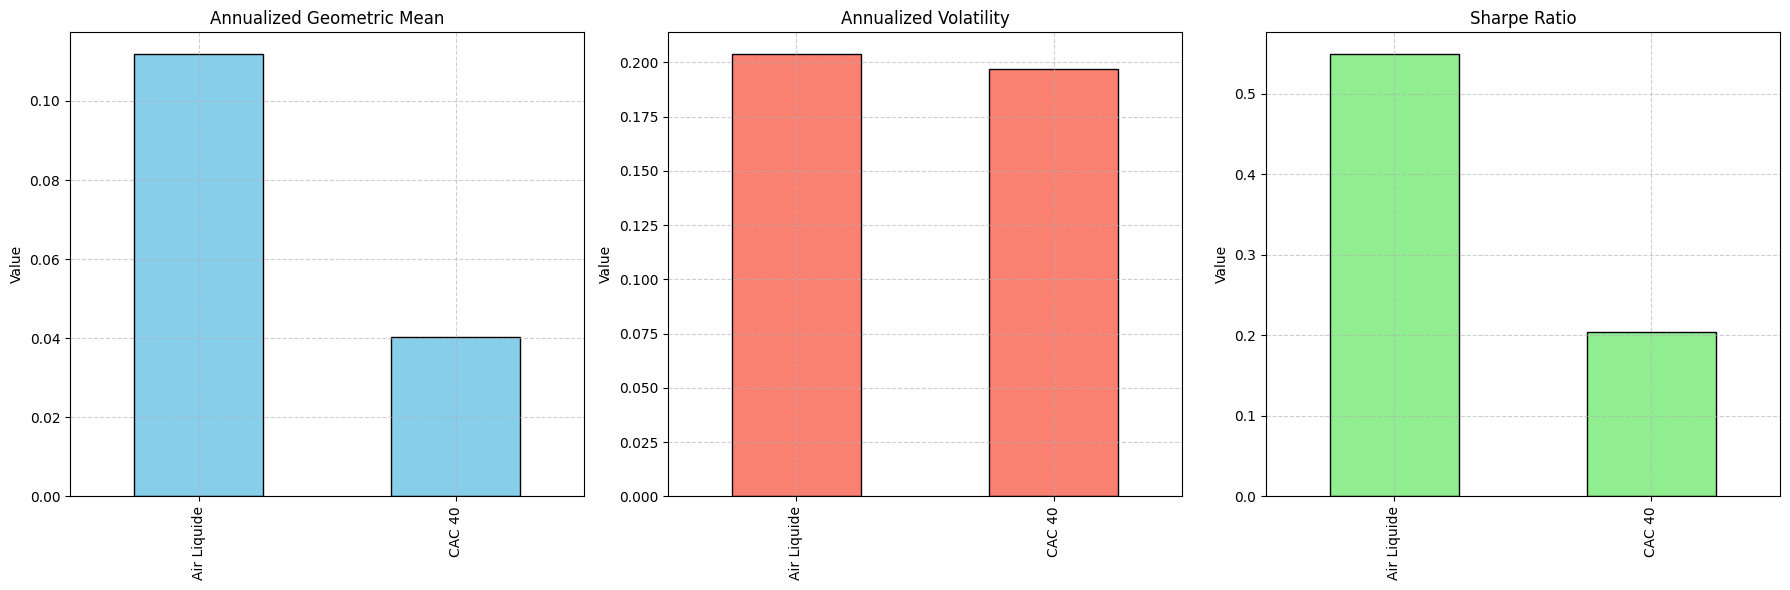

<Figure size 800x600 with 0 Axes>

In [72]:
# Daily variance
variance_daily = returns.var()

# Daily standard deviation
std_daily = returns.std()

# Annualized standard deviation
std_annual = std_daily * np.sqrt(252)

# Sharpe Ratio
sharpe_ratio = geometric_mean_annual / std_annual

# Results
print("=" * 50)
print("STATISTICAL ANALYSIS OF RETURNS")
print("=" * 50)

print("\n📊 ANNUALIZED GEOMETRIC MEAN:")
print(geometric_mean_annual.round(4))

print("\n📈 ANNUALIZED VOLATILITY:")
print(std_annual.round(4))

print("\n🎯 SHARPE RATIO:")
print(sharpe_ratio.round(3))

print("\n📉 DAILY VARIANCE:")
print(variance_daily.round(6))

#print("\n🔗 CORRELATION MATRIX:")
#print(cor.round(3))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Geometric Mean
geometric_mean_annual.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Annualized Geometric Mean")
axes[0].set_ylabel("Value")
axes[0].grid(True, linestyle="--", alpha=0.6)

# Volatility
std_annual.plot(kind="bar", ax=axes[1], color="salmon", edgecolor="black")
axes[1].set_title("Annualized Volatility")
axes[1].set_ylabel("Value")
axes[1].grid(True, linestyle="--", alpha=0.6)

# Sharpe Ratio
sharpe_ratio.plot(kind="bar", ax=axes[2], color="lightgreen", edgecolor="black")
axes[2].set_title("Sharpe Ratio")
axes[2].set_ylabel("Value")
axes[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(8,6))
#sns.heatmap(cor, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
#plt.title("Correlation Matrix")
plt.show()


PROBABILITY OF BEING PROFITABLE AFTER N YEARS

📊 Air Liquide:
------------------------------
1 years: 69.78% probability of profit
5 years: 87.74% probability of profit
10 years: 94.87% probability of profit
15 years: 97.89% probability of profit

📊 CAC 40:
------------------------------
1 years: 58.27% probability of profit
5 years: 67.76% probability of profit
10 years: 73.43% probability of profit
15 years: 77.20% probability of profit


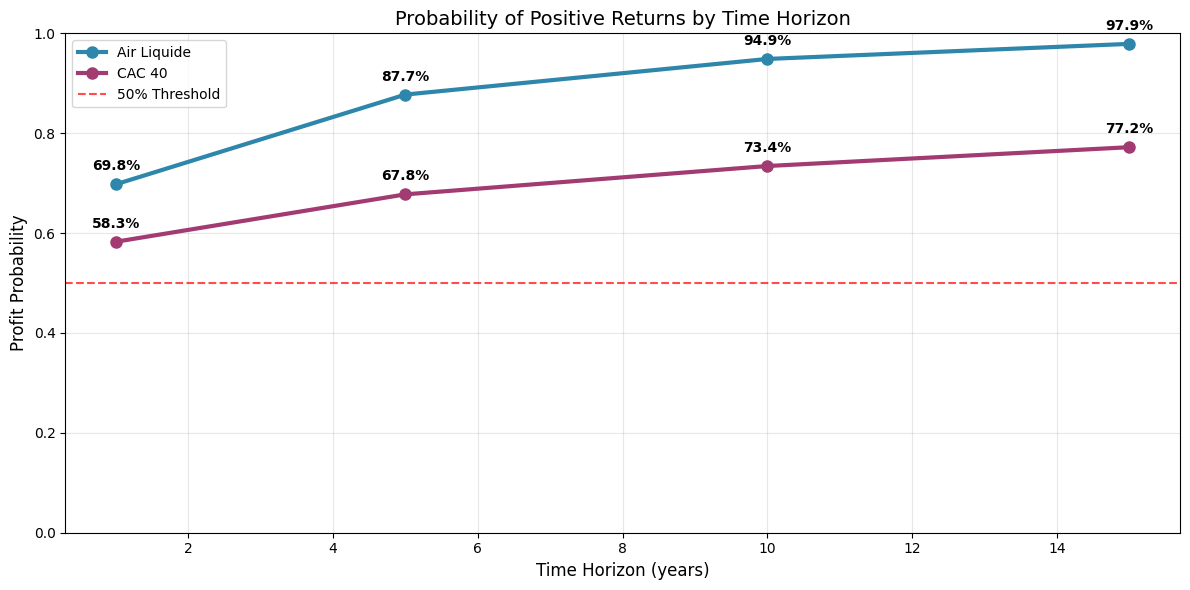


SIMPLIFIED STATISTICAL APPROACH (normal distribution)

📈 Air Liquide:
------------------------------
1 years: 73.31% probability of profit
2 years: 81.06% probability of profit
3 years: 85.95% probability of profit
5 years: 91.80% probability of profit
10 years: 97.55% probability of profit
15 years: 99.20% probability of profit

📈 CAC 40:
------------------------------
1 years: 61.75% probability of profit
2 years: 66.38% probability of profit
3 years: 69.77% probability of profit
5 years: 74.81% probability of profit
10 years: 82.78% probability of profit
15 years: 87.65% probability of profit


In [73]:
# Calculate profitability probability
def calculate_profit_probability(returns, years_list=[1, 5, 10, 15]):
    """
    Calculate the probability of having a positive return after N years
    based on Monte Carlo simulation with historical returns.
    """
    days_list = [years * 252 for years in years_list]
    results = {}

    for asset in returns.columns:
        asset_returns = returns[asset]
        n_simulations = 10000

        profit_probs = {}

        for years, days in zip(years_list, days_list):
            cumulative_returns_sim = []

            for _ in range(n_simulations):
                random_returns = np.random.choice(asset_returns, size=days, replace=True)
                cum_return = np.prod(1 + random_returns) - 1
                cumulative_returns_sim.append(cum_return)

            positive_returns = sum(1 for ret in cumulative_returns_sim if ret > 0)
            probability = positive_returns / n_simulations
            profit_probs[years] = probability

        results[asset] = profit_probs

    return results

# Calculate probabilities
profit_probabilities = calculate_profit_probability(returns)

# Calculate probabilities
profit_probabilities = calculate_profit_probability(returns)

# -----------------------------
# 11. VISUALIZATION OF RESULTS
# -----------------------------
print("=" * 60)
print("PROBABILITY OF BEING PROFITABLE AFTER N YEARS")
print("=" * 60)

for asset, probs in profit_probabilities.items():
    print(f"\n📊 {asset}:")
    print("-" * 30)
    for years, prob in probs.items():
        print(f"{years} years: {prob:.2%} probability of profit")

# -----------------------------
# 12. PLOT OF PROBABILITIES
# -----------------------------
plt.figure(figsize=(12, 6))
colors = ['#2E86AB', '#A23B72']

for i, (asset, probs) in enumerate(profit_probabilities.items()):
    years = list(probs.keys())
    probabilities = list(probs.values())

    plt.plot(years, probabilities, marker='o', linewidth=3,
             markersize=8, label=asset, color=colors[i])

    # Add labels with values
    for j, (x, y) in enumerate(zip(years, probabilities)):
        plt.annotate(f'{y:.1%}', (x, y), textcoords="offset points",
                    xytext=(0,10), ha='center', fontweight='bold')

plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% Threshold')
plt.xlabel('Time Horizon (years)', fontsize=12)
plt.ylabel('Profit Probability', fontsize=12)
plt.title('Probability of Positive Returns by Time Horizon', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# -----------------------------
# 13. ALTERNATIVE APPROACH (simpler)
# -----------------------------
def simple_profit_probability(returns, years_list=[1,2,3, 5, 10, 15]):
    """
    Simplified approach using normal distribution
    """
    results = {}

    for asset in returns.columns:
        asset_returns = returns[asset]
        daily_mean = asset_returns.mean()
        daily_std = asset_returns.std()

        profit_probs = {}

        for years in years_list:
            # Annualized parameters
            annual_mean = daily_mean * 252
            annual_std = daily_std * np.sqrt(252)

            # For N years
            n_years_mean = annual_mean * years
            n_years_std = annual_std * np.sqrt(years)

            # Probability that return > 0
            from scipy.stats import norm
            probability = 1 - norm.cdf(0, loc=n_years_mean, scale=n_years_std)
            profit_probs[years] = max(0, min(1, probability))  # Bound between 0 and 1

        results[asset] = profit_probs

    return results

# Calculate alternative approach
simple_probs = simple_profit_probability(returns)

print("\n" + "=" * 60)
print("SIMPLIFIED STATISTICAL APPROACH (normal distribution)")
print("=" * 60)

for asset, probs in simple_probs.items():
    print(f"\n📈 {asset}:")
    print("-" * 30)
    for years, prob in probs.items():
        print(f"{years} years: {prob:.2%} probability of profit")



📉 MAX DRAWDOWN - AIR LIQUIDE
Max Drawdown: -29.28%


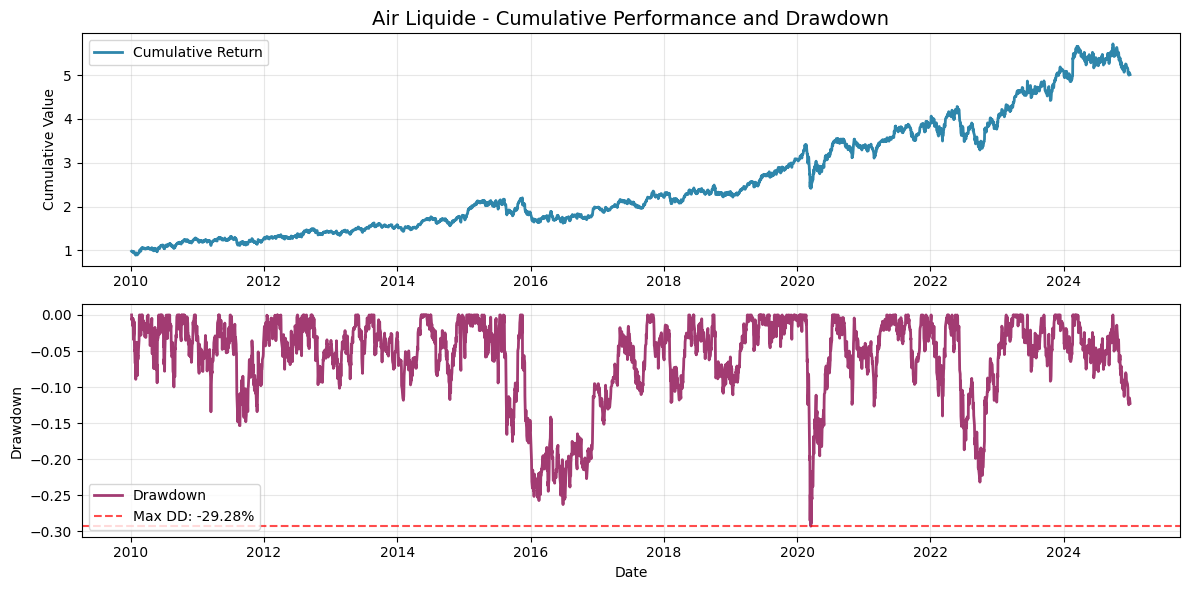

In [74]:
# Max drawdown calculation for Air Liquide
def calculate_max_drawdown(returns, asset_name="Air Liquide"):
    """
    Calculate Max Drawdown for a specific asset.
    """
    asset_returns = returns[asset_name]

    cumulative = (1 + asset_returns).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max

    max_dd = drawdown.min()

    return max_dd, drawdown, cumulative

# Calculation for Air Liquide
max_dd, drawdown_series, cumulative_series = calculate_max_drawdown(returns, "Air Liquide")

print("\n" + "=" * 60)
print("📉 MAX DRAWDOWN - AIR LIQUIDE")
print("=" * 60)
print(f"Max Drawdown: {max_dd:.2%}")

# Drawdown chart for Air Liquide
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(cumulative_series, label="Cumulative Return", color="#2E86AB", linewidth=2)
plt.title("Air Liquide - Cumulative Performance and Drawdown", fontsize=14)
plt.ylabel("Cumulative Value")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(drawdown_series, label="Drawdown", color="#A23B72", linewidth=2)
plt.axhline(y=max_dd, color="red", linestyle="--", alpha=0.7, label=f"Max DD: {max_dd:.2%}")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [75]:
def calculate_var_cvar(returns, alpha=0.05):
    """
    Calculate VaR and CVaR on daily basis.
    """
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))

    var = sorted_returns[index]
    cvar = sorted_returns[:index].mean()

    return var, cvar

var, cvar = calculate_var_cvar(returns['Air Liquide'])
print(var)
print(cvar)

-0.019751964851083437
-0.028246950023662228


Probability of drawdown

In [76]:
# Probability of drawdown
def prob_drawdown_exceedance(returns, threshold=-0.2):
    """
    Probability that drawdown exceeds a threshold (e.g. -20%)
    """
    cumulative = (1 + returns).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max

    exceed_prob = (drawdown <= threshold).mean()
    return exceed_prob

print(prob_drawdown_exceedance(returns['Air Liquide']))

0.04747000521648409
